In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage # tree and branches
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
df = pd.read_csv("input/dental_clinic_dataset.csv", index_col = 0)
df.head()

,City,Age,Gender,Appointment_Date,Treatment_Type,Treatment_Cost,Insurance_Provider,Has_Insurance,Appointment_Duration,Appointment_Time,Waiting_Time,Appointment_Status,Dentist,Tooth_Number,Treatment_Outcome,Patient_Satisfaction,Follow_up_Required,Medication_Prescribed,Comments
Patient_ID,,,,,,,,,,,,,,,,,,,
ad0bbd08-2ed5-4faa-9e3d-6aaf327ceb00,Glasgow,79,Male,2024-12-28,Braces,351.29,Bupa,False,102,05:43:51,23,Rescheduled,Deborah Cameron,36.0,Unsuccessful,6,False,NaN,Make save dream style beat not.
680044af-db03-4a08-959c-b775bde0b7ad,Edinburgh,28,Male,2024-01-07,Root Canal,136.94,Aviva,False,18,21:26:19,19,Completed,Kenneth Hernandez,NaN,Pending,10,True,NaN,Area maintain while case.
bc36576e-064f-4660-9b36-e099bdc186fb,Birmingham,84,Male,2025-02-04,Extraction,218.66,NHS,True,113,13:09:08,19,Completed,Eric Morton,48.0,Successful,10,True,NaN,Nature popular forget prevent improve.
2145b978-983b-42c9-a585-b20d2b0fa90e,Birmingham,57,Male,2023-06-29,Fillings,342.41,Bupa,True,37,09:54:58,58,Completed,Allen Smith,48.0,Successful,6,True,Ibuprofen,Administration happy opportunity recent pull n...
2f2fbf83-ce46-4389-b021-44d823b8bf10,London,78,Female,2024-07-29,Cleaning,432.95,Bupa,True,37,16:05:42,60,Rescheduled,Joy Willis,NaN,Successful,7,True,Ibuprofen,Boy recently account.


In [3]:
df.describe()

,Age,Treatment_Cost,Appointment_Duration,Waiting_Time,Tooth_Number,Patient_Satisfaction
count,100000.00000,100000.000000,100000.00000,100000.000000,80046.000000,100000.00000
mean,53.89548,275.380714,67.47100,29.977980,29.976464,5.49054
std,21.03790,129.974622,30.58702,17.673171,13.400639,2.87699
min,18.00000,50.000000,15.00000,0.000000,12.000000,1.00000
25%,36.00000,162.197500,41.00000,15.000000,24.000000,3.00000
50%,54.00000,275.920000,67.50000,30.000000,24.000000,5.00000
75%,72.00000,387.450000,94.00000,45.000000,36.000000,8.00000
max,90.00000,500.000000,120.00000,60.000000,48.000000,10.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, ad0bbd08-2ed5-4faa-9e3d-6aaf327ceb00 to 13feb689-b721-481f-8fec-305818102948
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   City                   100000 non-null  object 
 1   Age                    100000 non-null  int64  
 2   Gender                 100000 non-null  object 
 3   Appointment_Date       100000 non-null  object 
 4   Treatment_Type         100000 non-null  object 
 5   Treatment_Cost         100000 non-null  float64
 6   Insurance_Provider     100000 non-null  object 
 7   Has_Insurance          100000 non-null  bool   
 8   Appointment_Duration   100000 non-null  int64  
 9   Appointment_Time       100000 non-null  object 
 10  Waiting_Time           100000 non-null  int64  
 11  Appointment_Status     100000 non-null  object 
 12  Dentist                100000 non-null  object 
 13  Tooth_Number           80046 

In [5]:
# Select subset with only numerical columns

df_num = df.select_dtypes(exclude=[object,bool])
df_num.head()

,Age,Treatment_Cost,Appointment_Duration,Waiting_Time,Tooth_Number,Patient_Satisfaction
Patient_ID,,,,,,
ad0bbd08-2ed5-4faa-9e3d-6aaf327ceb00,79,351.29,102,23,36.0,6
680044af-db03-4a08-959c-b775bde0b7ad,28,136.94,18,19,NaN,10
bc36576e-064f-4660-9b36-e099bdc186fb,84,218.66,113,19,48.0,10
2145b978-983b-42c9-a585-b20d2b0fa90e,57,342.41,37,58,48.0,6
2f2fbf83-ce46-4389-b021-44d823b8bf10,78,432.95,37,60,NaN,7


## Correlation Estimate: Pearson

In [6]:
df_num.corr()

,Age,Treatment_Cost,Appointment_Duration,Waiting_Time,Tooth_Number,Patient_Satisfaction
Age,1.000000,0.004307,0.000615,-0.000963,0.000207,-0.004233
Treatment_Cost,0.004307,1.000000,-0.000976,-0.001828,0.007397,-0.003665
Appointment_Duration,0.000615,-0.000976,1.000000,-0.001799,-0.001721,-0.001166
Waiting_Time,-0.000963,-0.001828,-0.001799,1.000000,0.000884,-0.000740
Tooth_Number,0.000207,0.007397,-0.001721,0.000884,1.000000,-0.003684
Patient_Satisfaction,-0.004233,-0.003665,-0.001166,-0.000740,-0.003684,1.000000


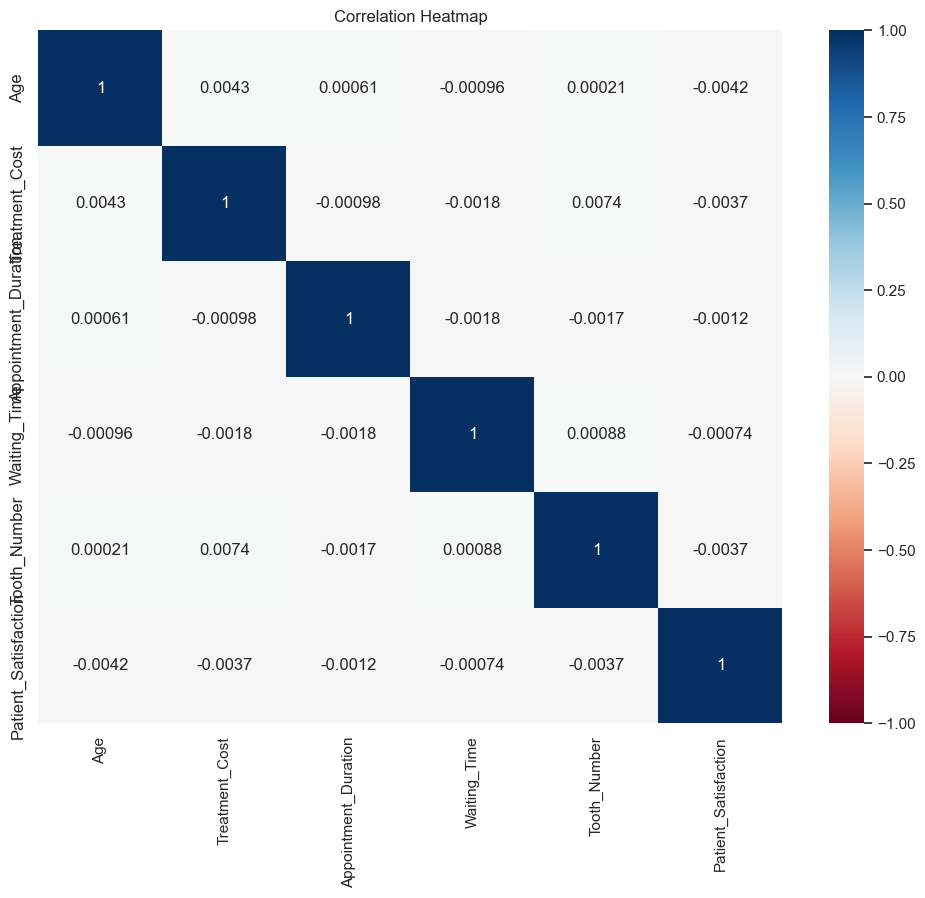

In [7]:
plt.figure(figsize=(12,9))
s = sns.heatmap(df_num.corr(), 
                annot = True, 
                cmap = 'RdBu',
               vmin = -1,
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_yticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

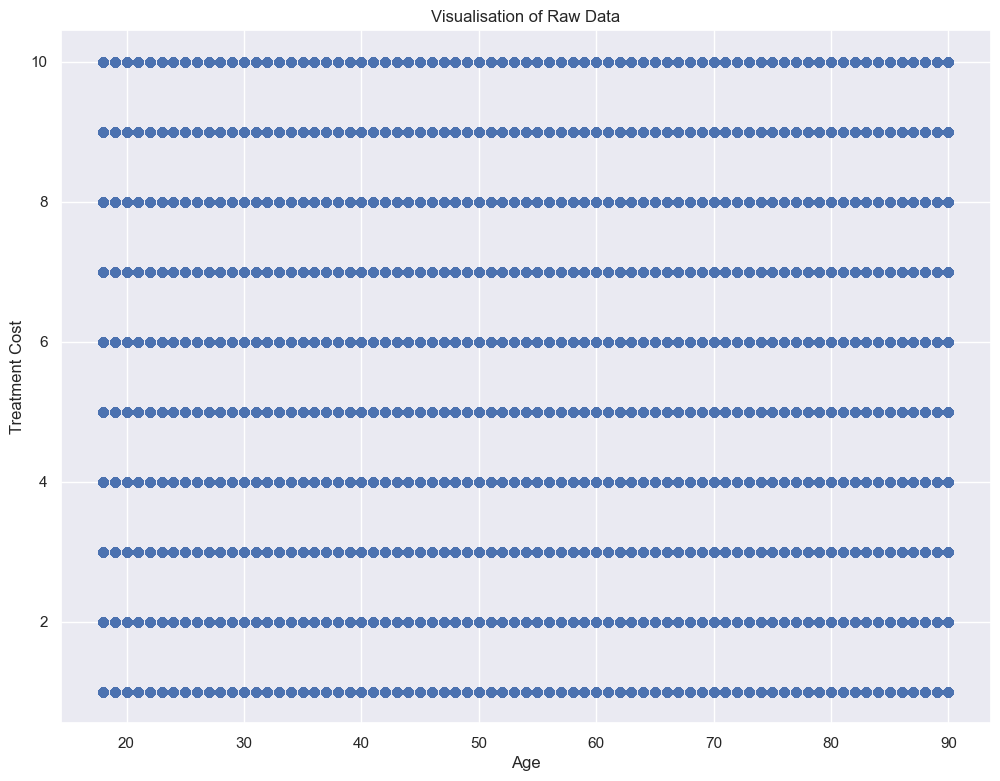

In [8]:
plt.figure(figsize = (12,9))
plt.scatter(df_num.iloc[:, 0], df_num.iloc[:, 5])
plt.xlabel('Age')
plt.ylabel('Treatment Cost')
plt.title('Visualisation of Raw Data')
plt.show()

In [9]:
# Standardise numerical data
scaler = StandardScaler()
df_num_std = scaler.fit_transform(df_num)
df_num_std

array([[ 1.1933057 ,  0.58403452,  1.12888317, -0.39483662,  0.44949901,
         0.17708177],
       [-1.2309028 , -1.06514183, -1.61739348, -0.62116952,         nan,
         1.56743056],
       [ 1.4309732 , -0.43640056,  1.48851464, -0.62116952,  1.34498427,
         1.56743056],
       ...,
       [-0.7555678 , -0.49910542, -0.11348007, -0.62116952, -0.44598625,
        -1.21326701],
       [-1.0407688 , -1.48145595,  0.54039532,  1.52899306,         nan,
         1.21984336],
       [ 1.2883727 , -0.22612769, -0.04809254, -0.33825339,  0.44949901,
        -0.86567982]])

## Hierarchical Clustering

### Finding the cluster rule of thumb: 
We find the longest vertical line unintercepted by a horizontaline from the dendogram. This is where we should make the cut.
Hierarchical Clustering:
- Con: Very slow O(N)
- Pro: It finds the number of clusters

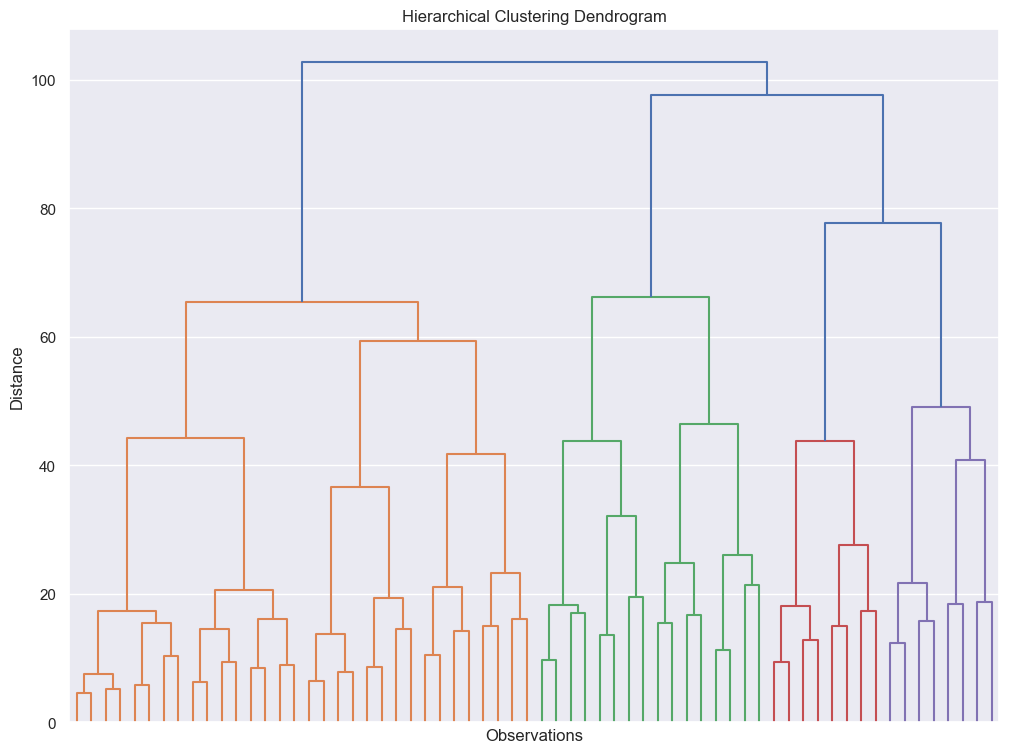

In [12]:
hier_clust = linkage(df_num_std[:10000, :4], method = 'ward')

plt.figure(figsize = (12, 9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust, 
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)
plt.show()

In [ ]:
## K-Means Clustering